# Bike Sharing Analysis 
- **Nama:** Walker Valentinus Simanjuntak
- **Email:** iss21012@students.del.ac.id

In [1]:
import pandas as pd

In [2]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

In [3]:
def data_overview(df, head=5):
    print("Shape".center(4,'-'))
    print("Rows: {}".format(df.shape[0]))
    print("Columns: {}".format(df.shape[1]))
    print("\n")
    print("Missing Values".center(4,'-'))
    print(df.isna().sum())
    print("\n")
    print("Data Head".center(4, '-'))
    print(df.head())

In [5]:
data_overview(day)

Shape
Rows: 731
Columns: 16


Missing Values
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Data Head
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         67

In [6]:
data_overview(hour)

Shape
Rows: 17379
Columns: 17


Missing Values
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Data Head
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.

In [10]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
pd.unique(day['season'])

array([1, 2, 3, 4], dtype=int64)

In [13]:
season_analysis = day.iloc[:,[2, 13, 14, 15]]
season_analysis

,season,casual,registered,cnt
0,1,331,654,985
1,1,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,1,247,1867,2114
727,1,644,2451,3095
728,1,159,1182,1341
729,1,364,1432,1796


In [15]:
season = ['Spring', 'Summer', 'Autumn', 'Winter']

In [17]:
season_analysis.loc[:,'season'] = season_analysis['season'].replace([1,2,3,4], season)

In [18]:
season_analysis.groupby('season').sum()

,casual,registered,cnt
season,,,
Autumn,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [19]:
pd.unique(day['holiday'])

array([0, 1], dtype=int64)

In [27]:
holiday = ['No', 'Yes']

In [28]:
holiday_analysis = day.iloc[:,[5, 13, 14]]
holiday_analysis

,holiday,casual,registered
0,0,331,654
1,0,131,670
2,0,120,1229
3,0,108,1454
4,0,82,1518
...,...,...,...
726,0,247,1867
727,0,644,2451
728,0,159,1182
729,0,364,1432


In [29]:
holiday_analysis.loc[:, 'holiday'] = holiday_analysis['holiday'].replace([0, 1], holiday)

In [30]:
holiday_analysis_result = holiday_analysis.groupby('holiday').sum()
holiday_analysis_result

,casual,registered
holiday,,
No,597658,2616586
Yes,22359,56076


<Axes: xlabel='holiday'>

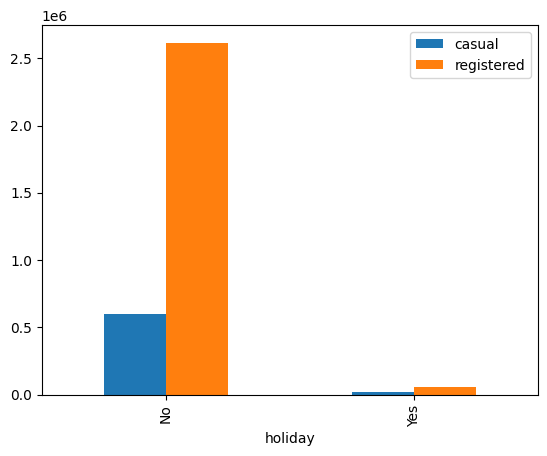

In [33]:
holiday_analysis_result.plot.bar()